### Load prediction (3d array)

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

data_path = "../../saves/"
file_name = "pred_0000.npz"
pred= np.load(data_path+file_name, 'r')

### take one batch out and convert to ppm

In [7]:
img = pred['arr_0'].squeeze()
print(img.shape)
num_frame = img.shape[0]
#flatten the batch dimension
h, w = img.shape[2], img.shape[3]

img_b0 = np.reshape(img[:,0,:,:], (-1, h, w,1))
print('reshaped', img_b0.shape)
np.savez(data_path+"seq2seq/"+file_name,img_b0)
# run manta to convert to ppm

(40, 5, 64, 64)
('reshaped', (40, 64, 64, 1))


### visualization of predictions

<IPython.core.display.Javascript object>


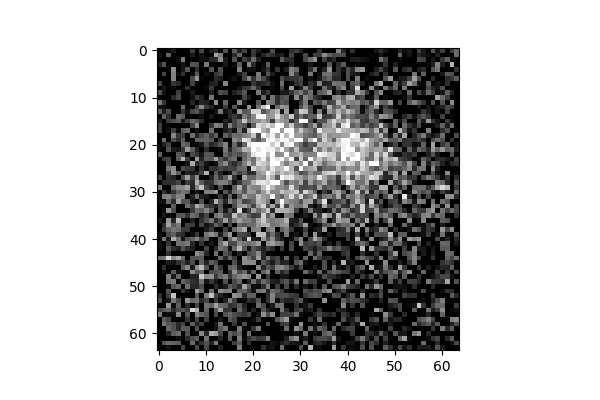

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "html5"
from IPython.display import HTML


pred_path = "../../saves/seq2seq/"
sim_id = str(0).zfill(4)

fig = plt.figure()
ims = []
for img_id in range(num_frame):
    img = Image.open(pred_path+'pred_'+sim_id + "_"+ str(img_id)+'.ppm')
    im = plt.imshow(img, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)

### comparison with ground truth

<IPython.core.display.Javascript object>


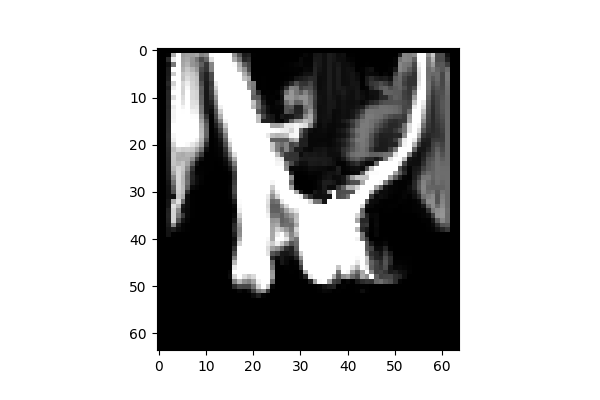

In [25]:
%matplotlib notebook
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "html5"
from IPython.display import HTML

dir_path ="../test_data/sim_1004/"

fig = plt.figure()
ims = []
for i in range(num_frame):
    img_id = str(i).zfill(4)
    img = Image.open(dir_path+'density_low_'+img_id+'.ppm')
    im = plt.imshow(img, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)